# Support Vector Machines #

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://prateekvjoshi.files.wordpress.com/2012/08/2d-to-3d-projection.jpeg", 
      width = 500, height = 500)

**Idea**: _We try to find a plane within the feature space that separates classes_
<br>

Primarily suited for classification, but highly versatile
<br>
<br>
**Applications**:
- Binary Classification
- Multi-Class Classification
- Regression

**Techniques**:
- Consider different definitions or degrees of "separation"
- Apply some transformations so that separation is possible

### Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

## Hyperplanes and Linear SVM classifier

**Equation of a Hyperplane in p-dimensions**

$
\beta_0 + \beta_1\mathbf{X_1} \ + ... + \ \beta_p\mathbf{X_p} = 0
$

We have points on the hyperplane:
<br>
<br>
$ 
\mathbf{X} = [\mathbf{X_1}, ..., \mathbf{X_p}]^T
$
<br>
<br>
where $\mathbf{X}$ is a feature vector and $\beta_0, \beta_1, ..., \beta_p$ are the parameter values

We can use this to make classifications by considering one class defined by:
<br>
$
\beta_0 + \beta_1\mathbf{X_1} \ + ... + \ \beta_p\mathbf{X_p} > 0
$


With the other class defined by:
<br>
$
\beta_0 + \beta_1\mathbf{X_1} \ + ... + \ \beta_p\mathbf{X_p} < 0
$


**Note**: Each instance or observation of the data is defined by the observed values for X1, ..., Xp

## Or a decent example...

In [16]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*nUpw5agP-Vefm4Uinteq-A.png", 
      width = 500, height = 500)

## Example with Iris data

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y);

<Figure size 864x194.4 with 0 Axes>

Text(0.5,0,'Petal length')

Text(0,0.5,'Petal width')

[0, 5.5, 0, 2]

Text(0.5,0,'Petal length')

[0, 5.5, 0, 2]

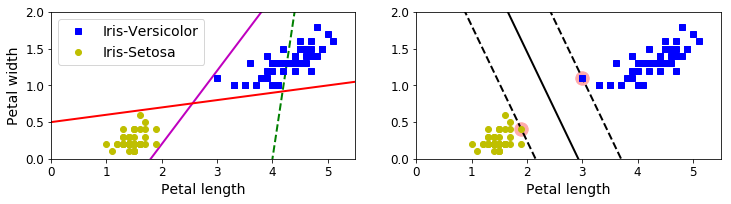

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### Soft Margin vs. Maximum/Hard Margin

Ideally we have a maximum margin classifier, where we can linearly separate the data by maximizing the margin (or distance that separates the closest observations from the two classes, circled on the right)

**Linear SVM classifier prediction**

$
\hat{y} = \begin{cases}
 -1 & \text{if } \mathbf{w}^T \mathbf{x} + b < 0, \\
 1 & \text{if } \mathbf{w}^T \mathbf{x} + b \geq 0
\end{cases}
$

**Equation 5-3: Hard margin linear SVM classifier objective**

$
\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

Minimizing $||w||$ is equivalent to maximizing the margin <br>
<br>
$\frac{1}{2}\mathbf{w}^T \mathbf{w}$ has derivative equal to $\mathbf{w}$ which gives the slope of the decision boundary

**Note**:<br>
- $\mathbf{w}$ is the parameter vector with the weights for the features
<br>
- b is the bias term $\beta_0$
<br>
- $t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m$ is the condition that we have no classification errors - we let $t^{(i)}$ = 1 for positive class and -1 otherwise

Data is often not linearly separable or the linear separation is not very clean due to noisy data, outliers, etc. Then we use a "soft margin"

Instead of having very narrow margins in order to fit the data with a perfect, linear separation (with no classification errors), we can have a "soft margin" to allow some classification errors 

**C is the regularization parameter that controls this "flexibility"**

**Equation 5-4: Soft margin linear SVM classifier objective**

$
\begin{split}
&\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}}\quad{\dfrac{1}{2}\mathbf{w}^T \mathbf{w} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$


$\zeta^{(i)}$ is the misclassification error for each observation
<br>
<br>
**Note**: this is very similar to the Hard-Margin optimization with the addition of misclassification errors and the fixed regularization parameter C

Smaller C values will make the margins tighter and eliminate classification errors on the training data. 

Higher C values will make the margins more flexible and allow errors on training data, but will likely generalize better and not as likely to overfit and be influenced by outliers

## Regularization example.)

In [4]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(C = float('inf'), kernel="linear")
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
svm_clf.coef_
svm_clf.intercept_

array([[1.29411744, 0.82352928]])

array([-3.78823471])

Text(0.5,0,'Petal length')

Text(0,0.5,'Petal width')

[0, 5.5, 0, 2]

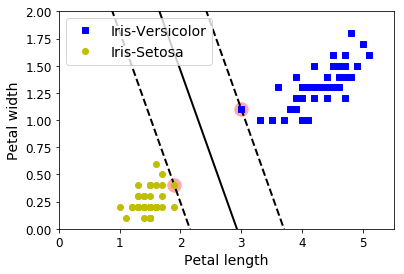

In [5]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

Text(0.5,1,'Matplot scatter plot')

Text(0.5,0,'X1')

Text(0,0.5,'X2')

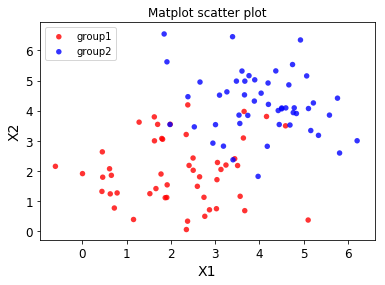

In [102]:
N = 50
g1 = [np.random.normal(2, 1, N), np.random.normal(2, 1, N)] 
g2 = [np.random.normal(4, 1, N), np.random.normal(4, 1, N)]

data = (g1, g2)
colors = ("red", "blue")
groups = ("group1", "group2") 
 
# create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

# fit svc
# need data as np array with y labels
#svm_clf = SVC(C = float('inf'), kernel="linear")
#svm_clf.fit(X, y)

#plot_svc_decision_boundary(svm_clf, -1, 6)
plt.title('Matplot scatter plot')
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc=2)
plt.show()

In [138]:
X1 = np.array(g1[0]).reshape(50, 1)
X2 = np.array(g1[1]).reshape(50, 1)
X = np.concatenate((X1,X2),axis=1)
X.mean()
X.sum()
X[:10]

2.0850642475957875

208.50642475957875

array([[1.77808755, 1.892674  ],
       [0.78548104, 1.26404808],
       [2.65028157, 1.80006015],
       [3.567353  , 1.15247651],
       [1.70169651, 3.54225595],
       [4.1636565 , 3.80449709],
       [0.44241721, 1.31426241],
       [3.05436355, 2.27552488],
       [3.67152024, 0.67492353],
       [1.79596942, 3.07305216]])

# Non-linear SVM classifier

In [27]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples=10000, noise=0.5, random_state=42)
X = moons[0]
y = moons[1]

In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
svm_clf = poly_kernel_svm_clf.fit(X, y)
sum(svm_clf.predict(X) == y) / len(y)

rbf_clf = SVC(kernel = 'rbf', coef0=1, C=5)
rbf_clf.fit(X,y)
sum(rbf_clf.predict(X) == y) / len(y)

0.8225

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.8224

In [209]:
moon_data = pd.DataFrame(data = X, columns = ['x1', 'x2'])
moon_data['target'] = y
X.shape
y.shape
y = y.reshape(10000, 1)
y.shape
np.hstack([X.T[0], X.T[1]])
np_data = np.vstack([X.T[0], X.T[1], y.T])
X[:10]
np_data.shape

(10000, 2)

(10000,)

(10000, 1)

array([ 1.90988784,  1.7820554 , -0.0416326 , ...,  0.13790015,
        0.60215705,  0.60815755])

array([[ 1.90988784,  0.61792287],
       [ 1.7820554 , -1.35694292],
       [-0.0416326 , -0.05740073],
       [ 0.24238275, -0.05974146],
       [-0.76570309,  0.92958435],
       [-1.12067507, -0.86740227],
       [ 1.93246207, -0.19395766],
       [-1.70559617, -0.52886793],
       [ 0.05869852, -0.08883938],
       [ 0.89137064, -0.34181733]])

(3, 10000)

In [208]:
# combining numpy arrays
a = np.array([[1],[2],[3]])
b = np.array([[2],[3],[4]])
a.shape
b.shape
np.vstack((a,b))
np.vstack((a,b)).shape
np.hstack((a,b))
np.hstack((a,b)).shape

(3, 1)

(3, 1)

array([[1],
       [2],
       [3],
       [2],
       [3],
       [4]])

(6, 1)

array([[1, 2],
       [2, 3],
       [3, 4]])

(3, 2)

In [180]:
np.hstack([X[0], X[1], y])

array([1.90988784, 0.61792287, 1.7820554 , ..., 1.        , 0.        ,
       1.        ])

In [177]:
zero = moon_data[(moon_data['target'] == 0)]
one = moon_data[(moon_data['target'] == 1)]
zero.head()
one.head()

,x1,x2,target
1,1.782055,-1.356943,0
2,-0.041633,-0.057401,0
3,0.242383,-0.059741,0
4,-0.765703,0.929584,0
6,1.932462,-0.193958,0


,x1,x2,target
0,1.909888,0.617923,1
5,-1.120675,-0.867402,1
7,-1.705596,-0.528868,1
8,0.058699,-0.088839,1
11,1.201546,-1.060925,1
